<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Breast_Cancer.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Breast Cancer Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Binary classification | Predict if a tumor is benign or malignant |


## About the dataset

The [Breast Cancer][1] dataset is used for multivariate binary classification. There are 569 total samples with 30 features each. Features were computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.

![](images/breast-cancer-logo.jpg)

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
pyo.init_notebook_mode()
from matplotlib.colors import ListedColormap
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
#
import warnings
warnings.filterwarnings("ignore")

## Package setup

In [2]:
#DO THE NECESSARY IMPORTS
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.offline as pyo 
import plotly.graph_objs as go
# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data
**EXERCISE: In a similar was as you did with iris and wine ;).**

In [3]:
breast = load_breast_cancer()
breast_data = breast.data

In [4]:
breast_labels = breast.target
breast_labels.shape
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [120]:
# Put data in a pandas DataFrame
df = pd.DataFrame(final_breast_data)
#df.iloc[0,:]
features = breast.feature_names
features_labels = np.append(features,'label')
df.columns = features_labels
#df['label'].replace(0, 'Benign',inplace=True)
#df['label'].replace(1, 'Malignant',inplace=True)
df.head()
df.tail()
#y = df['label']

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  label  
564                0.2216          0.2060                  0.07115    0.0  
565                0.1628          0.2572                  0.06637    0.0  
566                0.1418          0.2218                  0.07820    0.0  
567                0.2650          0.4087                  0.12400    0.0  
568                0.0000          0.2871                  0.07039    1.0  

[5 rows x 31 columns]

In [121]:
df.isna().any()
len(df.index)

569

Text(0.5, 1.0, 'Correlation Between Features')

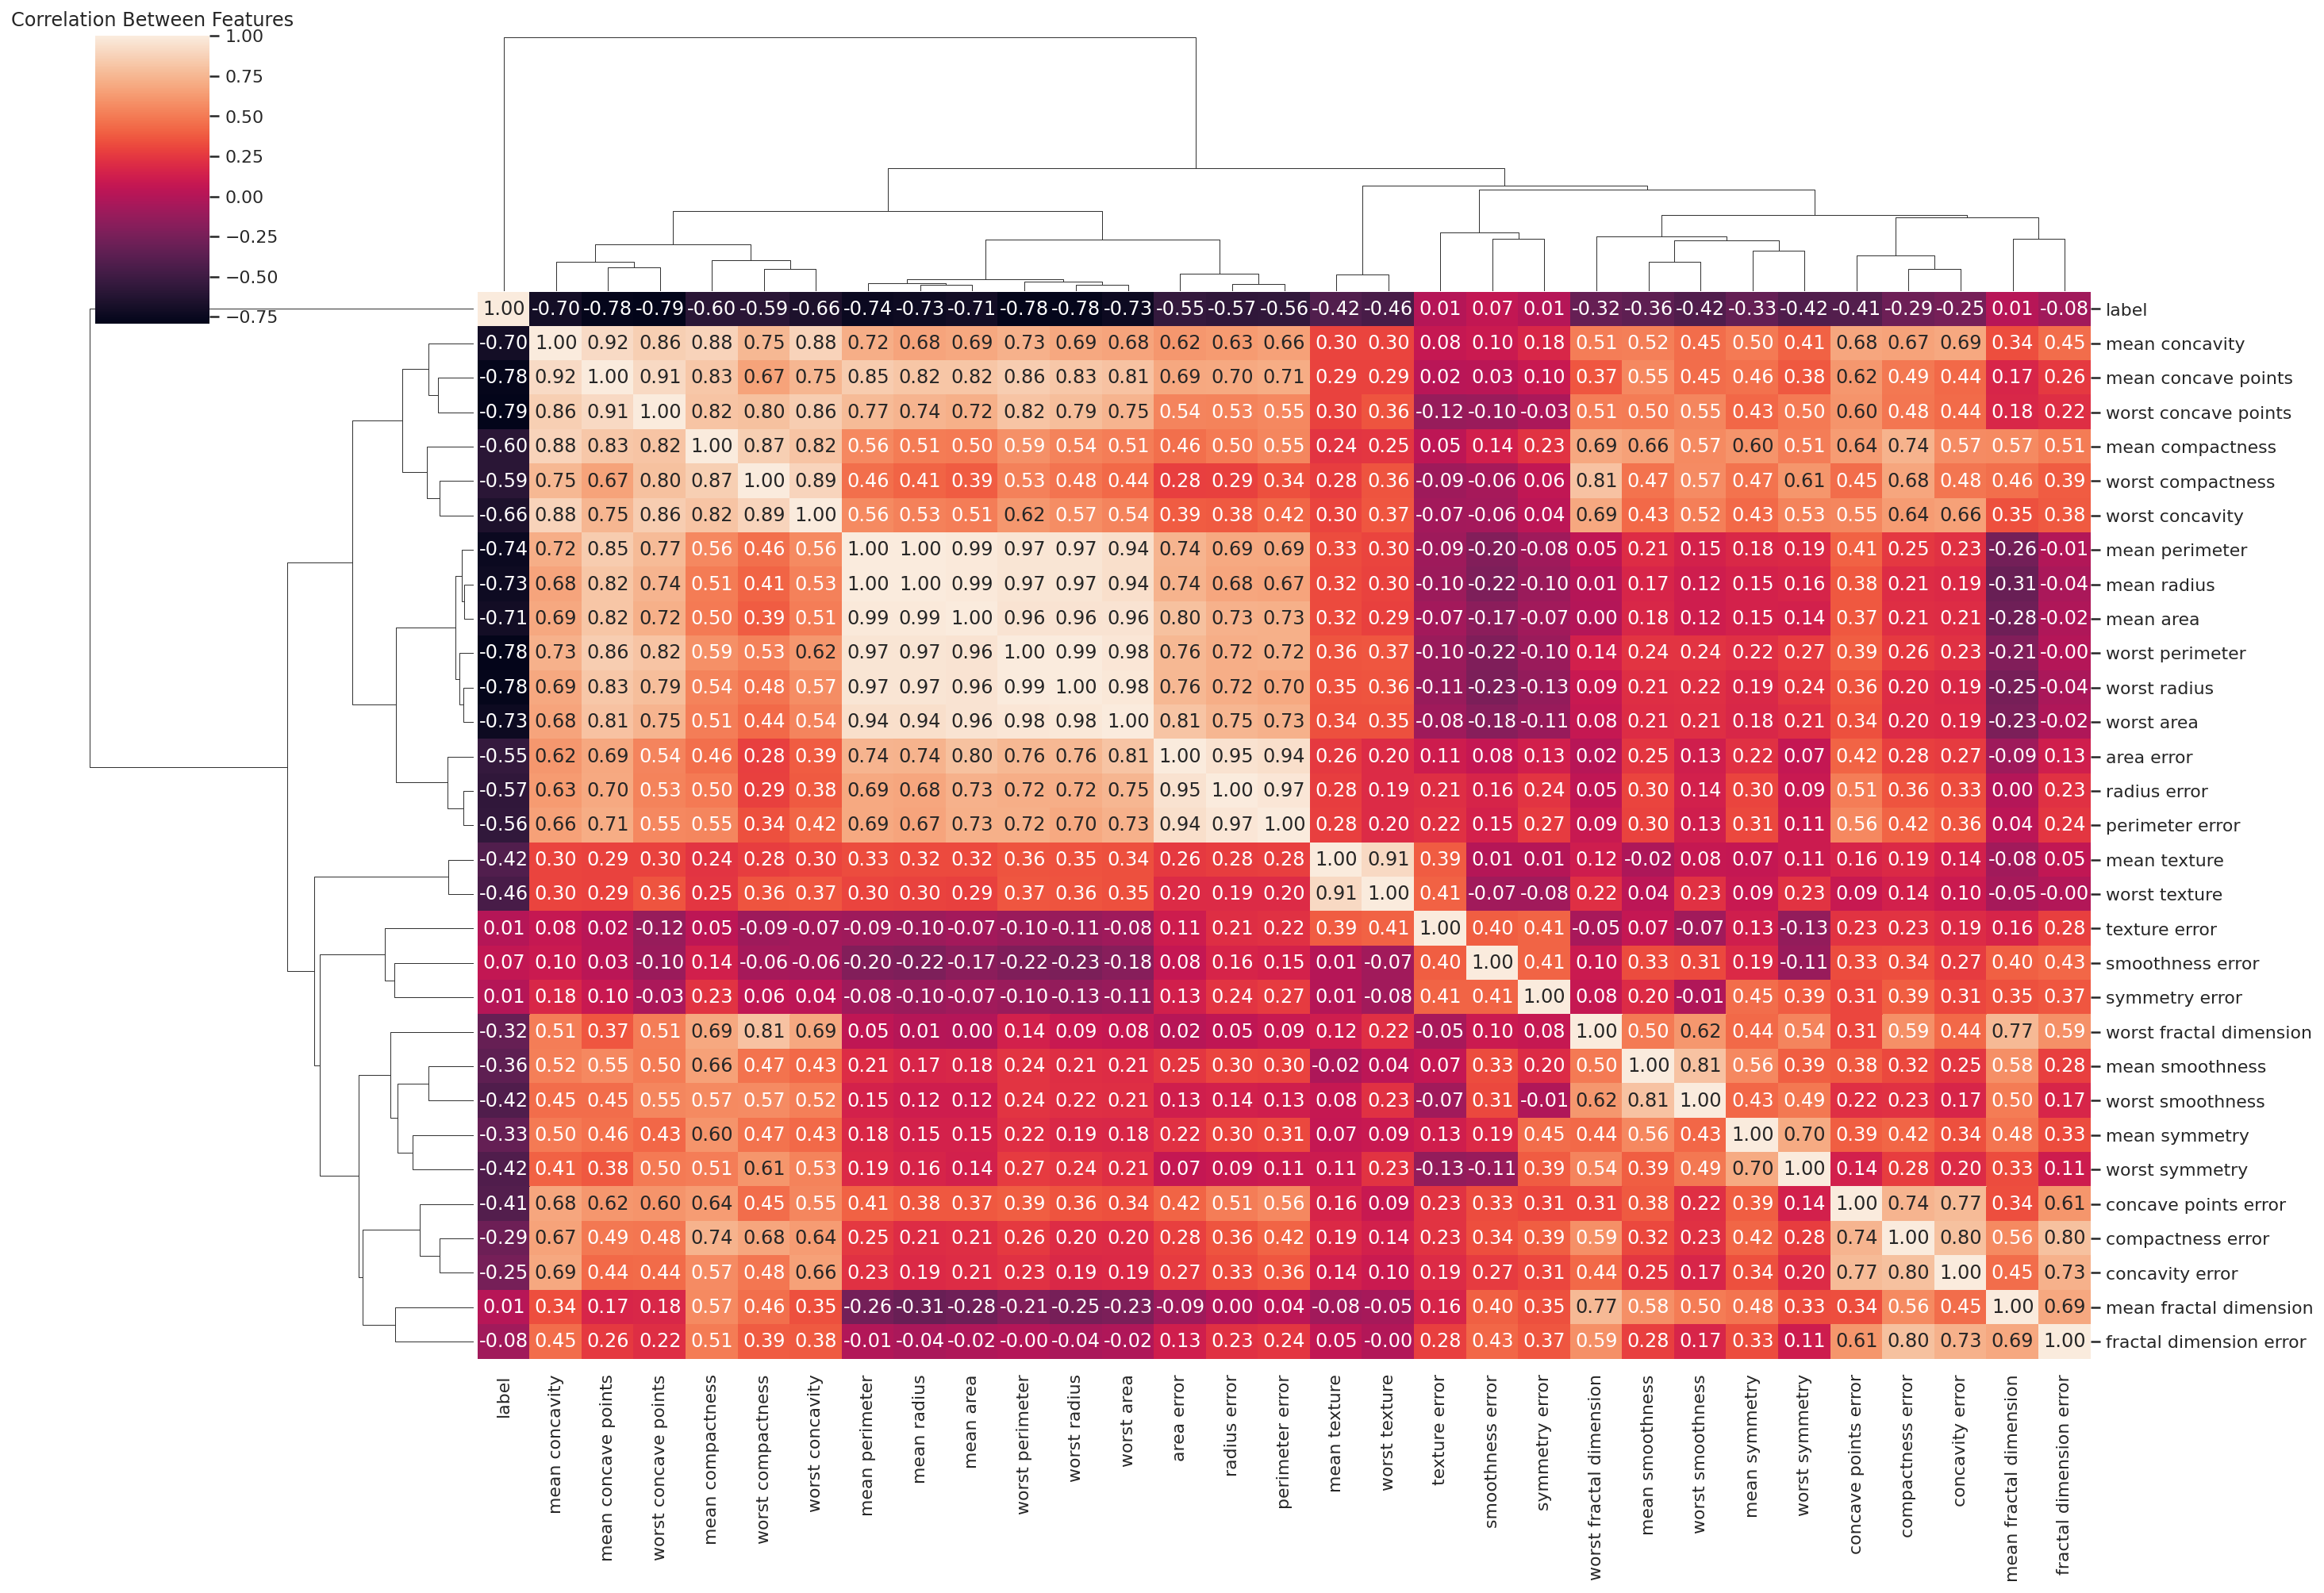

In [6]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,14))
plt.title("Correlation Between Features")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
data_m = df[df.label == 0]
data_b = df[df.label == 1]

trace = [go.Bar(x=df.label.unique(), y=(len(data_m),len(data_b)),
               marker=dict(color=["blue","brown"]))]
               
layout = go.Layout(title="Count of Malignant, Benign ")# üst üste gelecek şekilde..
fig = go.Figure(data=trace,layout=layout)   
pyo.iplot(fig)



In [46]:
ydf = df["label"]
x = df.drop(["label"],axis=1)
columns = x.columns.tolist()


In [47]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)


In [48]:
y_pred[:10]

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1])

In [49]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score.head()

score
0 -1.422440
1 -1.066782
2 -0.978948
3 -1.596933
4 -1.069936

In [50]:
threshold = -2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


In [51]:
# Radius for our outliers
radius = (X_score.max()-X_score)/(X_score.max()-X_score.min())
trace0 = go.Scatter(x=x.iloc[outlier_index,0], y=x.iloc[outlier_index,1],
                   mode="markers",
                   marker=dict(size=10,color="brown"),
                   name="outliers"
                   )

trace1 = go.Scatter(x=x.iloc[:,0], y=x.iloc[:,1],
                   mode="markers",
                   marker=dict(size=50*radius,color="gold"),
                   name="real points"
                   )
 
layout = go.Layout(title="Outliers (Depends on Threshold Value)",hovermode="closest")
fig = go.Figure(data=[trace0,trace1],layout=layout)
pyo.iplot(fig)

In [52]:
x = x.drop(outlier_index)
y = ydf.drop(outlier_index)


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test  = sc.transform(x_test) 


In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



In [56]:
knn_cm = confusion_matrix(y_test,y_pred)
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_cm)
print(knn_acc)

[[ 59   8]
 [  0 120]]
0.9572192513368984


In [57]:
# Tuning Decision Tree Model
n_neighbors = [5,7,9,11,13,15,17,19,21]
weights = ["uniform","distance"]
metric = ["euclidean","manhattan","minkowski"]
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [58]:
knn = KNeighborsClassifier()
gs = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.9414651493598862
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(metric='manhattan',n_neighbors=9,weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [59]:
knn_cm = confusion_matrix(y_test,y_pred)
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_cm)
print(knn_acc)

[[ 59   8]
 [  0 120]]
0.9572192513368984


## Apply the PCA Method

In [131]:
#do the necessary imports
ydf = df["label"]
x = df.drop(["label"],axis=1)

In [132]:
len(ydf.index)

569

In [133]:
# PCA needs scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [134]:
# Build PCA
pca = PCA(n_components = 6)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)

In [135]:
pca_data = pd.DataFrame(X_reduced_pca,columns=["p1","p2","p3","p4","p5","p6"])
pca_data["label"] = ydf

In [136]:
hue =pca_data["label"]
data = [go.Scatter(x = pca_data.p1,
                   y = pca_data.p2,
                   mode = 'markers',
                   marker=dict(
                           size=12,
                           color=hue,
                           symbol="pentagon",
                           line=dict(width=2) #çevre çizgileri
                           ))]  
                            
layout = go.Layout(title="PCA",
                   xaxis=dict(title="p1"),
                   yaxis=dict(title="p2"),
                   hovermode="closest")
fig = go.Figure(data=data,layout=layout)   
pyo.iplot(fig)

In [137]:
pca_data.tail()

p1        p2        p3        p4        p5        p6  label
564   6.439315 -3.576817  2.459487  1.177314 -0.074825 -2.375192    0.0
565   3.793382 -3.584048  2.088476 -2.506028 -0.510722 -0.246710    0.0
566   1.256179 -1.902297  0.562731 -2.089227  1.809991 -0.534447    0.0
567  10.374794  1.672010 -1.877029 -2.356031 -0.033742  0.567937    0.0
568  -5.475243 -0.670637  1.490443 -2.299157 -0.184704  1.617839    1.0

In [138]:
x_pca = pca_data #.drop(["label"],axis=1)
print(x_pca.isna().any())
#print('s',len(y_pca))
print(len(x_pca))
x_pca = x_pca.dropna()
y_pca = x_pca.label
x_pca = pca_data.drop(["label"],axis=1)
print(y_pca.isna().sum())
print(len(y_pca))
print(len(x_pca))

p1       False
p2       False
p3       False
p4       False
p5       False
p6       False
label    False
dtype: bool
569
0
569
569


In [171]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.2, random_state=42)

In [173]:
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(x_test_pca)
knn_cm_pca = confusion_matrix(y_test_pca,y_pred_pca)
knn_acc_pca = metrics.accuracy_score(y_test_pca, y_pred_pca)
print(knn_cm_pca)
print(knn_acc_pca)

[[40  3]
 [ 3 68]]
0.9473684210526315


In [176]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
breast_labels.shape
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

# Put data in a pandas DataFrame
df = pd.DataFrame(final_breast_data)
#df.iloc[0,:]
features = breast.feature_names
features_labels = np.append(features,'label')
df.columns = features_labels


ydf = df["label"]
x = df.drop(["label"],axis=1)

# PCA needs scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Build PCA
pca = PCA(n_components = 6)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)

pca_data = pd.DataFrame(X_reduced_pca,columns=["p1","p2","p3","p4","p5","p6"])
pca_data["label"] = ydf

x_pca = pca_data #.drop(["label"],axis=1)
#print(x_pca.isna().any())
#print('s',len(y_pca))
#print(len(x_pca))
x_pca = x_pca.dropna()
y_pca = x_pca.label
x_pca = pca_data.drop(["label"],axis=1)
#print(y_pca.isna().sum())
#print(len(y_pca))
#print(len(x_pca))
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.8, random_state=42)
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(x_test_pca)
knn_cm_pca = confusion_matrix(y_test_pca,y_pred_pca)
knn_acc_pca = metrics.accuracy_score(y_test_pca, y_pred_pca)
print(knn_cm_pca)
print(knn_acc_pca)

[[156  10]
 [ 11 279]]
0.9539473684210527


In [169]:
#x_train_pca

[[169  18]
 [ 11 302]]
0.942


Next, let's create a **new DataFrame** that will have the principal component values for all the samples.

In [ ]:
df_principal_breast = pd.DataFrame()

Once you have the principal components, you can find the **explained_variance_ratio**. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [ ]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

From the above output, you can observe that the principal component 1 holds **44.2%** of the information while the principal component 2 holds only **19%** of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

## Plotting the visualization

### Additional Challenge: Can you fix the labels in the plot so they are the original classes? 
Benign and Malign instead of 1 and 0